In [1]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

#display output directly below plotting commands inline
%matplotlib inline

In [2]:
#import review dataset using pandas, limit rows to 10,0000
reviews = pd.read_csv('../input files/yelp_review.csv', nrows= 10000)

In [3]:
#create a text length column at end of data set
reviews['text length'] = reviews['text'].apply(len)

#limit reviews to either 1 or 5 stars
review_class = reviews[(reviews['stars'] == 1) | (reviews['stars'] == 5)]
review_class.shape

(4427, 10)

In [4]:
#create variables for review text and rating
X = review_class['text']
y = review_class['stars']

import string

#Global stopwords to save processing power
stoplist = stopwords.words('english')

#text tokenizer
def text_processor(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stoplist and not word.isdigit()]

In [5]:
#vectorize the review text
text_vector = CountVectorizer(analyzer=text_processor).fit(X)

#determine length
len(text_vector.vocabulary_)

27121

In [6]:
#transform X
X = text_vector.transform(X)

In [7]:
#creation and splitting of training and testing models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
#import and train support vector machine model
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
#confusion matrix and report
svc_predict = svc.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix')
print(confusion_matrix(y_test, svc_predict))
print('\n')
print('Accuracy Report')
print(classification_report(y_test, svc_predict))

Confusion Matrix
[[ 80 108]
 [  3 695]]


Accuracy Report
              precision    recall  f1-score   support

           1       0.96      0.43      0.59       188
           5       0.87      1.00      0.93       698

    accuracy                           0.87       886
   macro avg       0.91      0.71      0.76       886
weighted avg       0.89      0.87      0.85       886



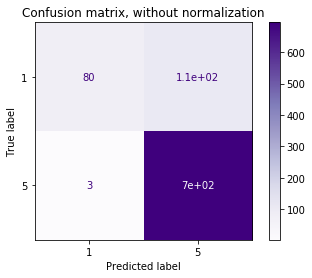

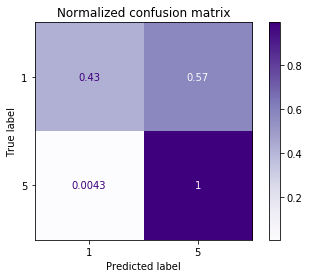

In [10]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 cmap=plt.cm.Purples,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

In [11]:
#output report to a csv file in 'output files'
reportDf = pd.DataFrame(classification_report(y_test, svc_predict, output_dict=True)).transpose()

reportDf.to_csv(r'../output files/SVM.csv', index = False)

print('Output written to SVM.csv')

Output written to SVM.csv
